In [1]:
#we will go through the different variables calculated and find how strongly correlated they are to the outcome of games
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
thirdConv_df = pd.read_csv("/Users/kyle/Desktop/NFLModel/data/3DConvCorrTest.csv")

In [4]:
thirdConv_df.head()

,HomeTeam,AwayTeam,3DConvAvg,3DConv75,3DConv66,Outcome
0,Arizona Cardinals,Green Bay Packers,7.80,7.850,7.834,-3
1,New York Jets,Cincinnati Bengals,-13.05,-11.275,-11.843,3
2,Indianapolis Colts,Tennessee Titans,2.10,2.000,2.032,-3
3,Houston Texans,Los Angeles Rams,-17.95,-21.975,-20.687,-16
4,Cleveland Browns,Pittsburgh Steelers,3.95,5.275,4.851,-5


In [5]:
thirdConv_df.describe()

,3DConvAvg,3DConv75,3DConv66,Outcome
count,58.000000,58.000000,58.000000,58.000000
mean,-0.680172,-0.465948,-0.534500,-1.793103
std,9.250699,9.632004,9.448831,15.691945
min,-23.600000,-22.750000,-22.478000,-38.000000
25%,-6.575000,-6.762500,-6.703000,-11.750000
50%,-0.125000,1.625000,1.606000,-2.500000
75%,5.800000,6.356250,6.245000,7.000000
max,21.150000,21.325000,21.269000,40.000000


<AxesSubplot:xlabel='3DConvAvg', ylabel='Outcome'>

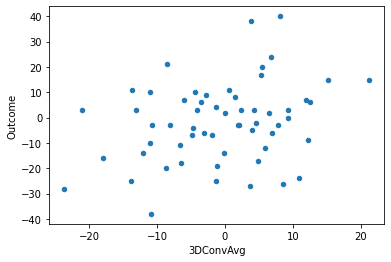

In [9]:
thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome')

In [10]:
x = thirdConv_df['3DConvAvg']
y = thirdConv_df['Outcome']
fit = np.polyfit(x, y, deg=1)
fit

array([ 0.5008943 , -1.45240896])

<function matplotlib.pyplot.show(close=None, block=None)>

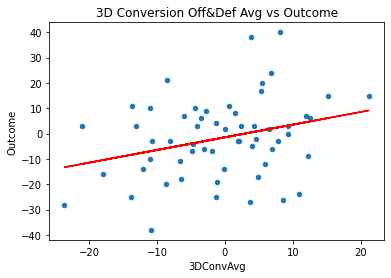

In [11]:
thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome')
plt.title('3D Conversion Off&Def Avg vs Outcome')

plt.plot(x, fit[0] * x + fit[1], color='red')
plt.show

In [12]:
from scipy import stats
stats.pearsonr(thirdConv_df['3DConvAvg'], thirdConv_df['Outcome'])

(0.2952866823957224, 0.02442868775996243)

'Outcome = 0.501 * Year + -1.452'

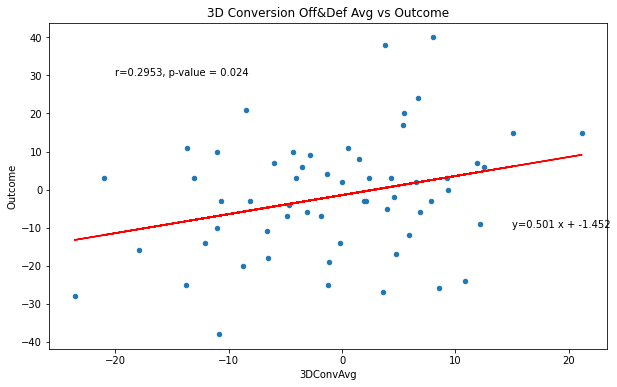

In [23]:
thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome', figsize=(10, 6))
plt.title('3D Conversion Off&Def Avg vs Outcome')

plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(15, -10))
pears = stats.pearsonr(thirdConv_df['3DConvAvg'], thirdConv_df['Outcome'])
plt.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))
plt.show
'Outcome = {0:.3f} * Year + {1:.3f}'.format(fit[0], fit[1]) 


<function matplotlib.pyplot.show(close=None, block=None)>

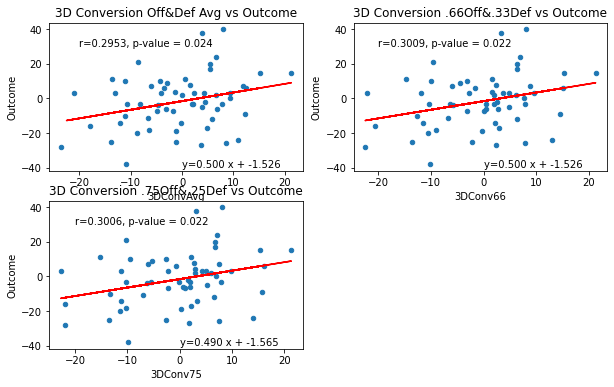

In [29]:
fig = plt.figure()

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

thirdConv_df.plot(kind='scatter', x='3DConvAvg', y='Outcome', figsize=(10, 6), ax=ax0)
ax0.set_title('3D Conversion Off&Def Avg vs Outcome')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(thirdConv_df['3DConvAvg'], thirdConv_df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))

thirdConv_df.plot(kind='scatter', x='3DConv66', y='Outcome', figsize=(10, 6), ax=ax1)
x = thirdConv_df['3DConv66']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('3D Conversion .66Off&.33Def vs Outcome')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(thirdConv_df['3DConv66'], thirdConv_df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))

thirdConv_df.plot(kind='scatter', x='3DConv75', y='Outcome', figsize=(10, 6), ax=ax2)
x = thirdConv_df['3DConv75']
fit = np.polyfit(x, y, deg=1)
ax2.set_title('3D Conversion .75Off&.25Def vs Outcome')
ax2.plot(x, fit[0] * x + fit[1], color='red')
ax2.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(thirdConv_df['3DConv75'], thirdConv_df['Outcome'])
ax2.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 30))

plt.show



In [30]:
#when taking into account the r, p, and corr values: .66off & .33def weighted average is the best predictor
#since it has max(r), min(p), max(corr)

In [43]:
df = pd.read_csv("/Users/kyle/Desktop/NFLModel/data/CorrTest.csv")

In [44]:
df.head()

,Arizona Cardinals,Green Bay Packers,RZPct,RZPct33,RZPct66,RZPct75,PressurePct,PressurePctAvg,YpD,YpD33,...,TOPct66,TOPct75,PpD,PpD33,PpD66,PpD75,PenAmtDiff,PenYarDiff,Vegas Line,Outcome
0,New York Jets,Cincinnati Bengals,0.1580,0.1665,0.1495,0.1455,0.023,0.0115,3.30,3.164,...,0.523,-0.933,0.590,0.5900,0.5900,0.5900,-2.6667,-19.3333,6.5,-3
1,Indianapolis Colts,Tennessee Titans,-0.0560,-0.0465,-0.0655,-0.0700,-0.013,-0.0065,-2.55,-2.737,...,-5.376,-6.320,-0.770,-0.8108,-0.7292,-0.7100,-0.5833,-17.3333,-11.5,3
2,Houston Texans,Los Angeles Rams,-0.1265,-0.1308,-0.1223,-0.1203,-0.089,-0.0445,0.70,0.224,...,5.088,3.832,0.065,0.0463,0.0837,0.0925,3.6667,31.2222,3.0,-3
3,Cleveland Browns,Pittsburgh Steelers,-0.1155,-0.1181,-0.1130,-0.1118,-0.021,-0.0105,-7.10,-5.094,...,-4.748,-6.276,-1.090,-0.9506,-1.2294,-1.2950,-2.3333,-19.2222,-16.5,-16
4,Detroit Lions,Philadelphia Eagles,-0.1080,-0.1206,-0.0954,-0.0895,0.003,0.0015,5.45,4.549,...,-0.768,-1.440,0.140,-0.0096,0.2896,0.3600,0.5972,-4.1944,5.0,-5


<function matplotlib.pyplot.show(close=None, block=None)>

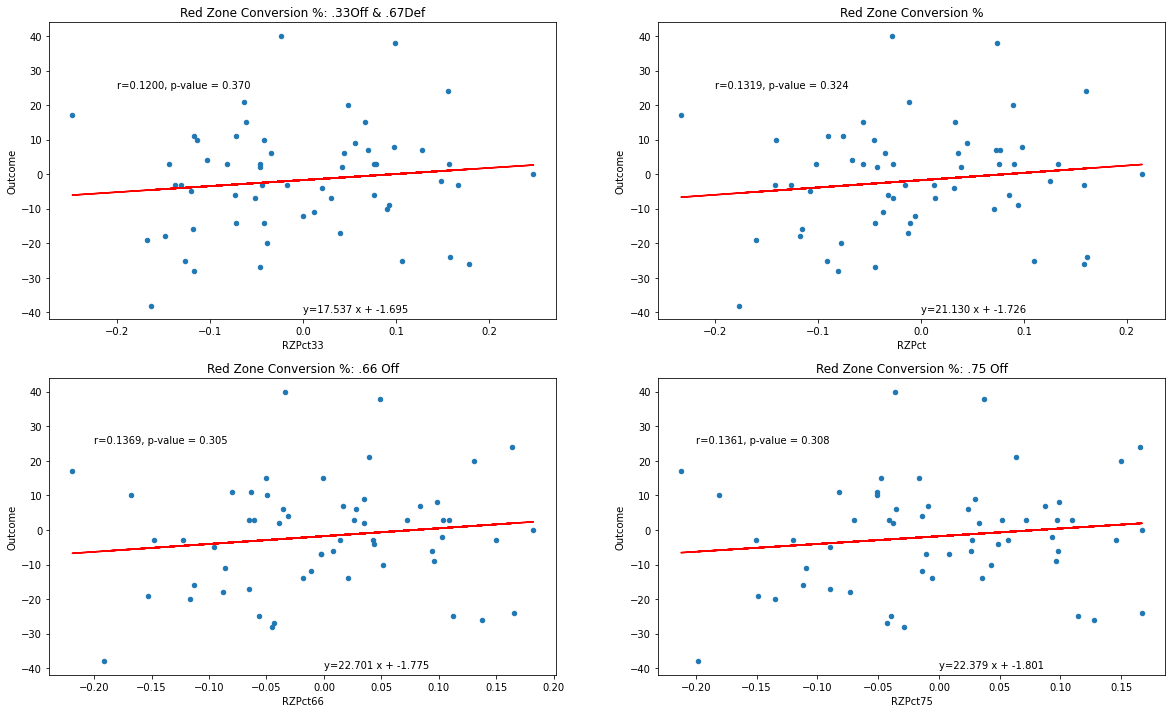

In [46]:
fig = plt.figure(figsize=(20,12))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

df.plot(kind='scatter', x='RZPct33', y='Outcome', ax=ax0)
x = df['RZPct33']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax0.set_title('Red Zone Conversion %: .33Off & .67Def')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(df['RZPct33'], df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-.2, 25))

df.plot(kind='scatter', x='RZPct', y='Outcome', ax=ax1)
x = df['RZPct']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('Red Zone Conversion %')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(df['RZPct'], df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-.2, 25))

df.plot(kind='scatter', x='RZPct66', y='Outcome', ax=ax2)
x = df['RZPct66']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax2.set_title('Red Zone Conversion %: .66 Off')
ax2.plot(x, fit[0] * x + fit[1], color='red')
ax2.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(df['RZPct66'], df['Outcome'])
ax2.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-.2, 25))

df.plot(kind='scatter', x='RZPct75', y='Outcome', ax=ax3)
x = df['RZPct75']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax3.set_title('Red Zone Conversion %: .75 Off')
ax3.plot(x, fit[0] * x + fit[1], color='red')
ax3.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(df['RZPct75'], df['Outcome'])
ax3.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-.2, 25))

plt.show

In [ ]:
#It shows that .66Offense+.33Defense weighted average is best predictor, although all are weak

Text(-0.04, 25, 'r=0.1085, p-value = 0.418')

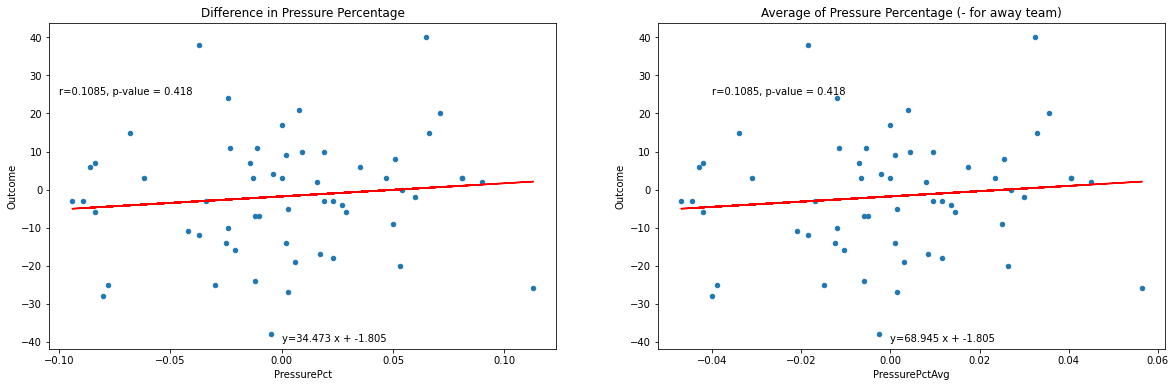

In [48]:
fig = plt.figure(figsize=(20,6))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

df.plot(kind='scatter', x='PressurePct', y='Outcome', ax=ax0)
x = df['PressurePct']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax0.set_title('Difference in Pressure Percentage')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(df['PressurePct'], df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-.1, 25))

df.plot(kind='scatter', x='PressurePctAvg', y='Outcome', ax=ax1)
x = df['PressurePctAvg']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('Average of Pressure Percentage (- for away team)')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(0, -40))
pears = stats.pearsonr(df['PressurePctAvg'], df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-.04, 25))

In [ ]:
#same degree of predicting outcome. Neither is strong and shouldn't be used

Text(-7.5, 25, 'r=0.2268, p-value = 0.087')

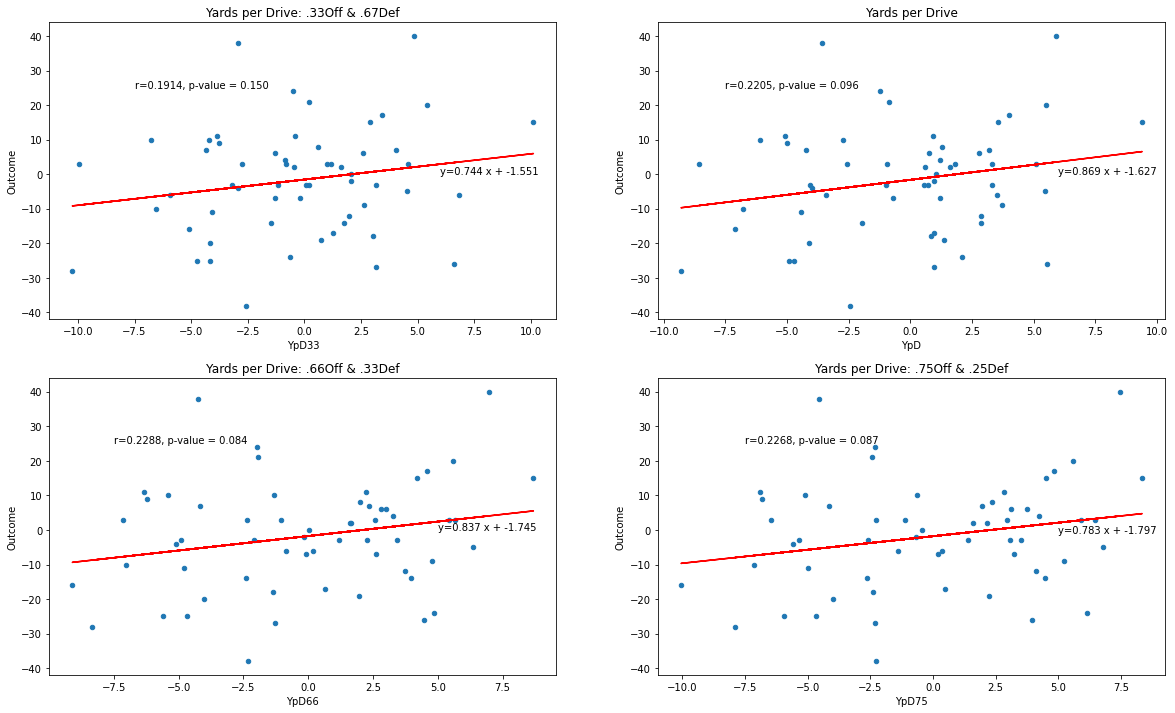

In [53]:
fig = plt.figure(figsize=(20,12))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

df.plot(kind='scatter', x='YpD33', y='Outcome', ax=ax0)
x = df['YpD33']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax0.set_title('Yards per Drive: .33Off & .67Def')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(6, 0))
pears = stats.pearsonr(df['YpD33'], df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

df.plot(kind='scatter', x='YpD', y='Outcome', ax=ax1)
x = df['YpD']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('Yards per Drive')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(6, 0))
pears = stats.pearsonr(df['YpD'], df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

df.plot(kind='scatter', x='YpD66', y='Outcome', ax=ax2)
x = df['YpD66']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax2.set_title('Yards per Drive: .66Off & .33Def')
ax2.plot(x, fit[0] * x + fit[1], color='red')
ax2.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(5, 0))
pears = stats.pearsonr(df['YpD66'], df['Outcome'])
ax2.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

df.plot(kind='scatter', x='YpD75', y='Outcome', ax=ax3)
x = df['YpD75']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax3.set_title('Yards per Drive: .75Off & .25Def')
ax3.plot(x, fit[0] * x + fit[1], color='red')
ax3.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(5, -1))
pears = stats.pearsonr(df['YpD75'], df['Outcome'])
ax3.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

In [ ]:
#The best predictor is the .66Offense + .33Defense weighted average

Text(-7.5, 25, 'r=0.1071, p-value = 0.423')

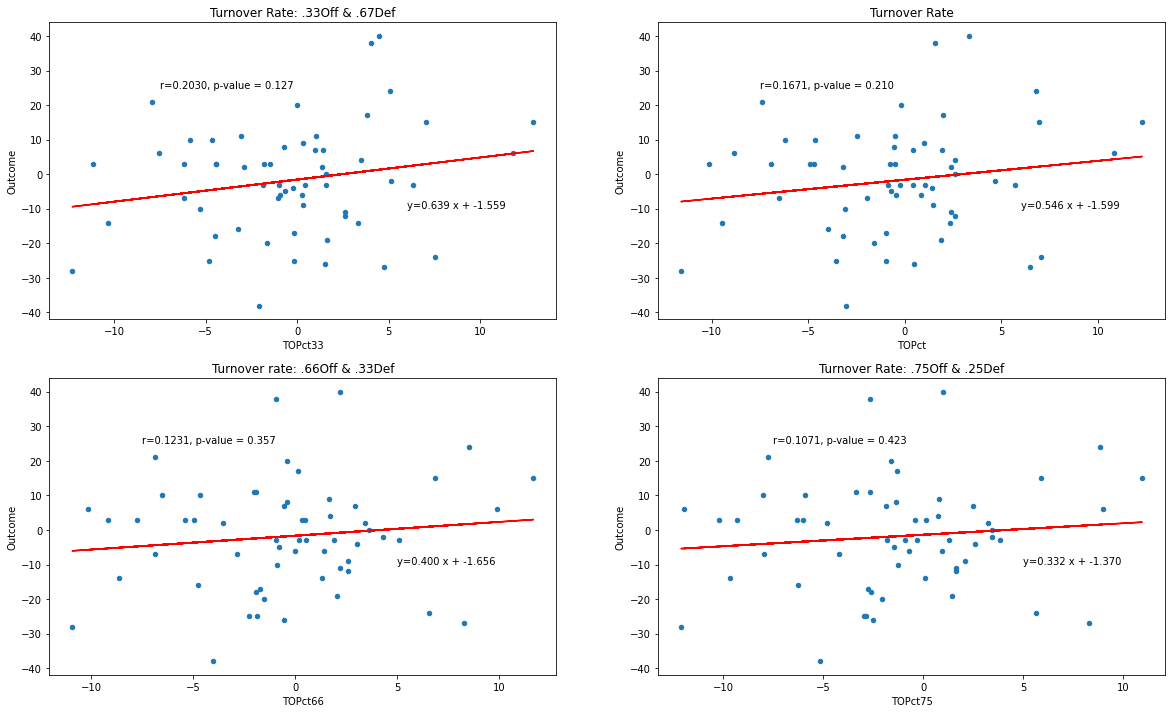

In [57]:
fig = plt.figure(figsize=(20,12))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

df.plot(kind='scatter', x='TOPct33', y='Outcome', ax=ax0)
x = df['TOPct33']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax0.set_title('Turnover Rate: .33Off & .67Def')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(6, -10))
pears = stats.pearsonr(df['TOPct33'], df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

df.plot(kind='scatter', x='TOPct', y='Outcome', ax=ax1)
x = df['TOPct']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('Turnover Rate')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(6, -10))
pears = stats.pearsonr(df['TOPct'], df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

df.plot(kind='scatter', x='TOPct66', y='Outcome', ax=ax2)
x = df['TOPct66']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax2.set_title('Turnover rate: .66Off & .33Def')
ax2.plot(x, fit[0] * x + fit[1], color='red')
ax2.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(5, -10))
pears = stats.pearsonr(df['TOPct66'], df['Outcome'])
ax2.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

df.plot(kind='scatter', x='TOPct75', y='Outcome', ax=ax3)
x = df['TOPct75']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax3.set_title('Turnover Rate: .75Off & .25Def')
ax3.plot(x, fit[0] * x + fit[1], color='red')
ax3.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(5, -10))
pears = stats.pearsonr(df['TOPct75'], df['Outcome'])
ax3.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-7.5, 25))

In [ ]:
#Best predictor is .33 Offense + .67 Defense

Text(-1, 25, 'r=0.2843, p-value = 0.031')

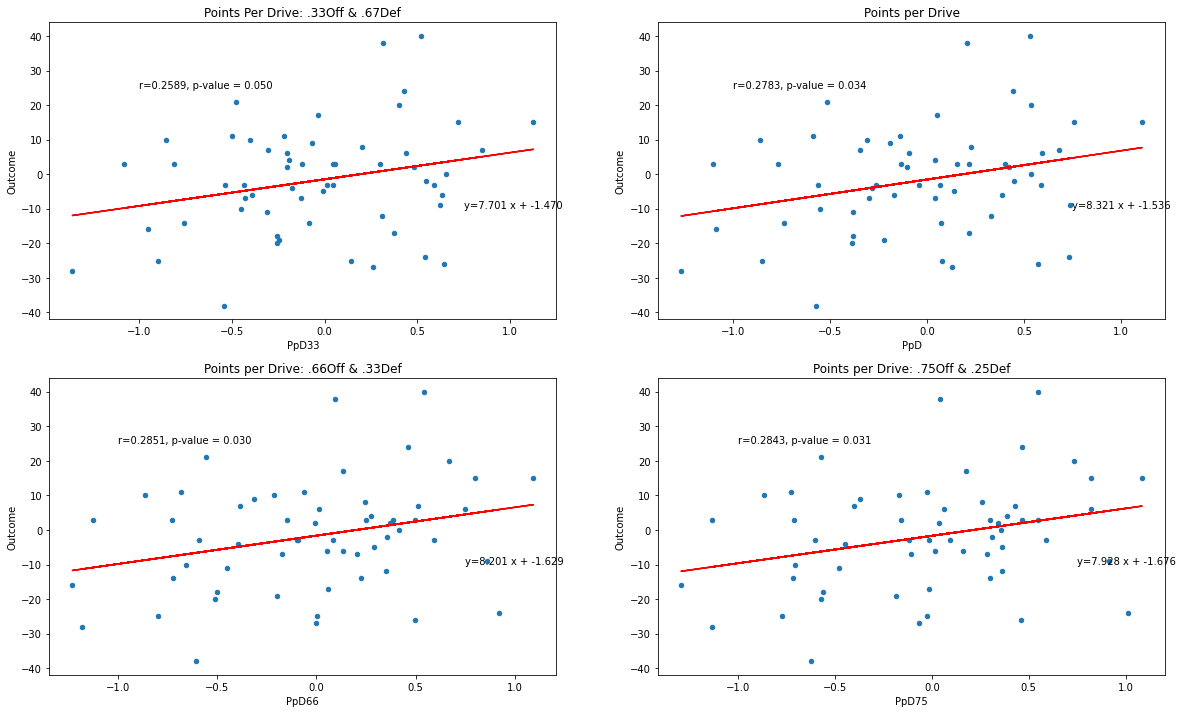

In [60]:
fig = plt.figure(figsize=(20,12))

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

df.plot(kind='scatter', x='PpD33', y='Outcome', ax=ax0)
x = df['PpD33']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax0.set_title('Points Per Drive: .33Off & .67Def')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(.75, -10))
pears = stats.pearsonr(df['PpD33'], df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-1, 25))

df.plot(kind='scatter', x='PpD', y='Outcome', ax=ax1)
x = df['PpD']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('Points per Drive')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(.75, -10))
pears = stats.pearsonr(df['PpD'], df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-1, 25))

df.plot(kind='scatter', x='PpD66', y='Outcome', ax=ax2)
x = df['PpD66']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax2.set_title('Points per Drive: .66Off & .33Def')
ax2.plot(x, fit[0] * x + fit[1], color='red')
ax2.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(.75, -10))
pears = stats.pearsonr(df['PpD66'], df['Outcome'])
ax2.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-1, 25))

df.plot(kind='scatter', x='PpD75', y='Outcome', ax=ax3)
x = df['PpD75']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax3.set_title('Points per Drive: .75Off & .25Def')
ax3.plot(x, fit[0] * x + fit[1], color='red')
ax3.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(.75, -10))
pears = stats.pearsonr(df['PpD75'], df['Outcome'])
ax3.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-1, 25))

In [ ]:
#All of these are very strong predictors, with .66 Offense + .75 Defense being the best
#This is the first p-value below .05

Text(-20, 25, 'r=-0.0372, p-value = 0.782')

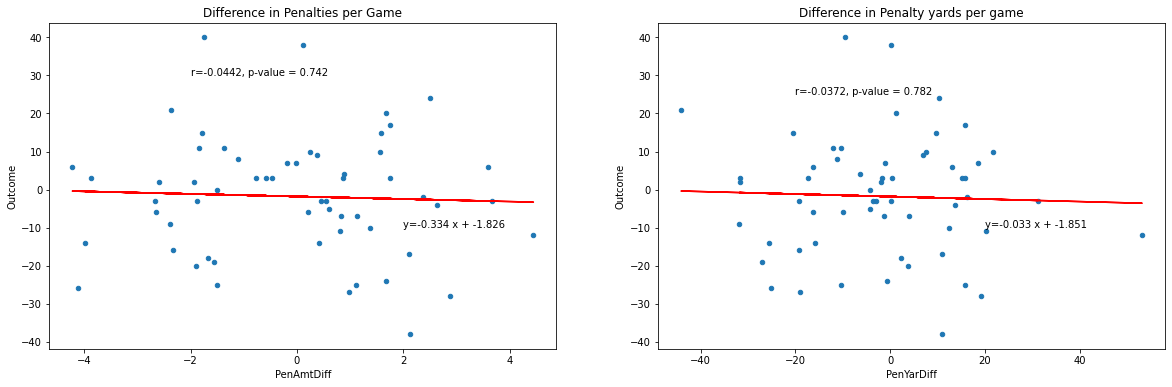

In [63]:
fig = plt.figure(figsize=(20,6))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

df.plot(kind='scatter', x='PenAmtDiff', y='Outcome', ax=ax0)
x = df['PenAmtDiff']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax0.set_title('Difference in Penalties per Game')
ax0.plot(x, fit[0] * x + fit[1], color='red')
ax0.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(2, -10))
pears = stats.pearsonr(df['PenAmtDiff'], df['Outcome'])
ax0.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-2, 30))

df.plot(kind='scatter', x='PenYarDiff', y='Outcome', ax=ax1)
x = df['PenYarDiff']
y = df['Outcome']
fit = np.polyfit(x, y, deg=1)
ax1.set_title('Difference in Penalty yards per game')
ax1.plot(x, fit[0] * x + fit[1], color='red')
ax1.annotate('y={0:.3f} x + {1:.3f}'.format(fit[0], fit[1]), xy=(20, -10))
pears = stats.pearsonr(df['PenYarDiff'], df['Outcome'])
ax1.annotate('r={0:.4f}, p-value = {1:.3f}'.format(pears[0], pears[1]), xy=(-20, 25))

In [ ]:
#Neither will be used to make predictions since both have very little correlation